### MODEL OLUŞTURMA

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

#veri seti

df=pd.read_csv("./Hitters.csv")
df=df.dropna()#csv dosyasındako eksik değerler silindi
df[:10]


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A


In [7]:
dms=pd.get_dummies(df[['League','Division','NewLeague']])#Kategorik değişkeni kukla/gösterge değişkenlerine dönüştürün.(max verim almak için)
df[:10]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A


In [15]:
from sklearn.model_selection import train_test_split
y=df["Salary"]#bağimsiz değ
x_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
x=pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.25,
                                               random_state=42)

###### Bir futbol takımına oyuncu almak istiyor.ona ne kadar maaş vereceğini veri bilimi ile belirlemek isteniyor.

In [16]:
#model nesnemizi oluşturuyoruz
ridge_model=Ridge(alpha=0.1).fit(x_train,y_train)

In [17]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
ridge_model.coef_ #modeldeki alfa değeri 1 olduğunda değerlerini gösterir.

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

#### Katsayılar ,
####
###### array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
######        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
######        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
######         -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
######        112.14640272, -99.80997876, -48.07152768])
####
#### Farklı lamda değerlerine karşılık farklı katsayılar oluşacak ve her farklı lambda değeri ile oluşan kat sayılar üzerinden kurulan modeller bunların neticesinde ortaya çıkan hatalar incelenecek ve buna göre optimum lamdaya kara verilecek

In [20]:
ridge_model.intercept_

-4.578626905721308

In [24]:

lambdalar=10**np.linspace(10,-2,100)*0.5

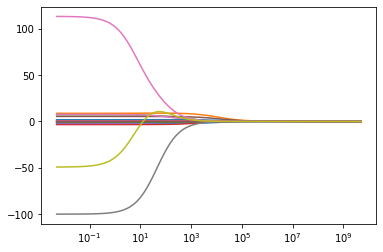

In [27]:
# Farklı lamda değerlerine karşılık farklı katsayılar oluşacak bunu hesaplamak için
ridge_model=Ridge()
katsayılar=[]
for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(x_train,y_train)
    katsayılar.append(ridge_model.coef_)
    
# Farklı lamda değerlerine karşılık farklı katsayılar listesinde oluştu.
# Bu durumu gözlemk için grafik oluştururuz

ax=plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale("log")#hepsini gözlemlek için ölçek değişimi işlemi

In [ ]:
##### lambda nın sıfır olduğu yer Ekk dır.